<a href="https://colab.research.google.com/github/amazzoli/ComponentSystemsData/blob/main/datasets/books/inspect_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the repository in the colab folder structure
%%bash
git clone https://github.com/amazzoli/ComponentSystemsData.git

Cloning into 'ComponentSystemsData'...


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

# Changing directory where the notebook is placed
os.chdir('/content/ComponentSystemsData/datasets/books')

sys.path.append('/content/ComponentSystemsData/py_utils/')
import plot_utils as pu

# Inspecting book components: **words** (from Project Gutenberg https://www.gutenberg.org/)

The table `components.tsv` contains information about:

- **sparse_id**: identifier of the matrix coordinates in the sparse representation.
- **word**: word.
- **abundance**: number of brick istances appearing in the all the lego sets.
- **occurrence**: number of lego sets in which the brick is present.

In [4]:
components = pd.read_csv('data/components.tsv', sep='\t', index_col=0)
components

,word,count,book_count
id,,,
0,the,12474903,3035
1,and,6962474,3035
2,of,6741417,3035
3,to,5793554,3034
4,a,4594709,3035
...,...,...,...
447227,diurni,1,1
447228,diuturna,1,1
447229,diuturnity,1,1


### Abundance statistics
Ranked abundances (Zipf's law) and abundance distribution

In [7]:
components = components.rename({'count':'abundance', 'book_count':'occurrence'}, axis=1)

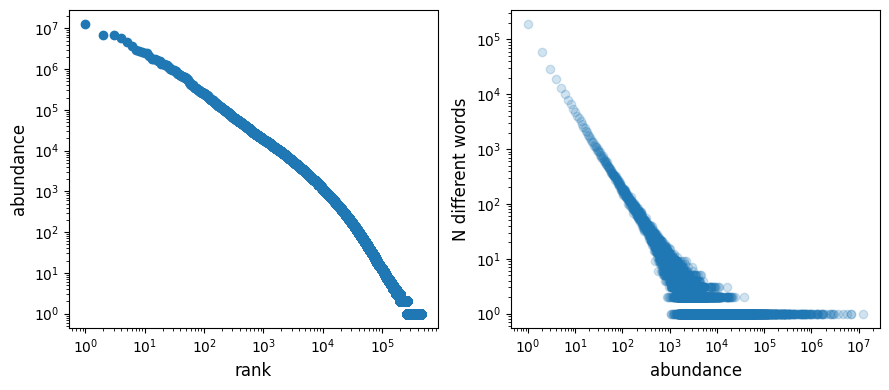

In [10]:
abundances = components.abundance.values

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4))

ax1 = pu.plot_count_rank(ax1, abundances, ylabel='abundance')

ax2 = pu.plot_count_hist_nobin(ax2, abundances, alpha=0.2, xlabel='abundance', ylabel='N different words')

plt.tight_layout()

### Sharing statistics

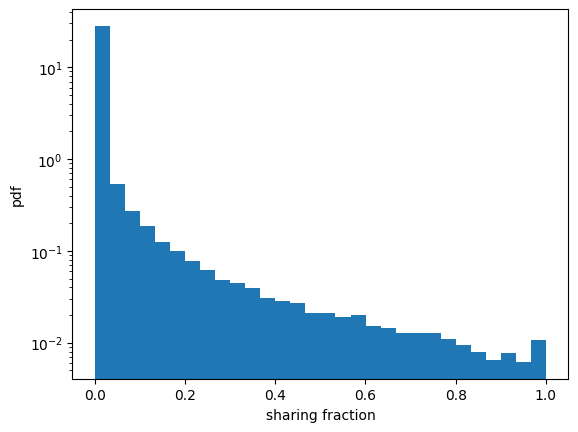

In [11]:
sharing_frac = components.occurrence / max(components.occurrence)

plt.yscale('log')
plt.xlabel('sharing fraction')
plt.ylabel('pdf')
h = plt.hist(sharing_frac, bins=30, density=True)